In [1]:
!pip install skimpy

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [40]:
df=pd.read_csv("tested.csv")

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 418    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %     ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ PassengerId      │    0 │        0 │   1100 │    120 │    890 │   1000 │   1100 │   1200 │  1300 │ ▇▇▇▇▇▇  │  │
│ │ Survived         │    0 │        0 │   0.36 │   0.48 │      0 │      0 │      0 │      1 │     1 │ ▇    ▅  │  │
│ │ Pclass           │    0 │        0 │    2.3 │   0.84 │      1 │      1 │      3 │      3 │     3 │ ▃  ▃ ▇  │  │
│ │ Age              │   86 │    20.57 │     30 │     14 │   0.17 │     21 │     27 │     39 │    76 │  ▂▇▇▃▂  │  │
│ │ SibSp            │    0 │        0 │   0.45 │    0.9 │      0 │      0 │      0 │      1 │     8 │    ▇    │  │
│ │ Parch            │    0 │        0 │   0.39 │   0.98 │      0 │      0 │      0 │      0 │     9 │   ▇▁    │  │
│ │ Fare             │    1 │     0.24 │     36 │     56 │      0 │    7.9 │     14 │     32 │   510 │    ▇    │  │
│ └──────────────────┴──────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %         ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │        0 │            0 │                         4.1 │                    1727 │  │
│ │ Sex                      │        0 │            0 │                           1 │                     418 │  │
│ │ Ticket                   │        0 │            0 │                         1.3 │                     543 │  │
│ │ Cabin                    │      327 │        78.23 │                        0.28 │                     118 │  │
│ │ Embarked                 │        0 │            0 │                           1 │                     418 │  │
│ └──────────────────────────┴──────────┴──────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [45]:
df.shape

(418, 12)

In [46]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [47]:
df = df.drop(columns=['Cabin'], axis=1)


In [48]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

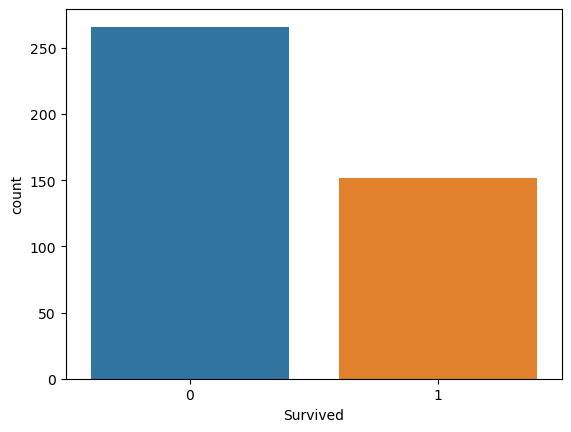

In [49]:
sns.countplot(x='Survived',data=df)

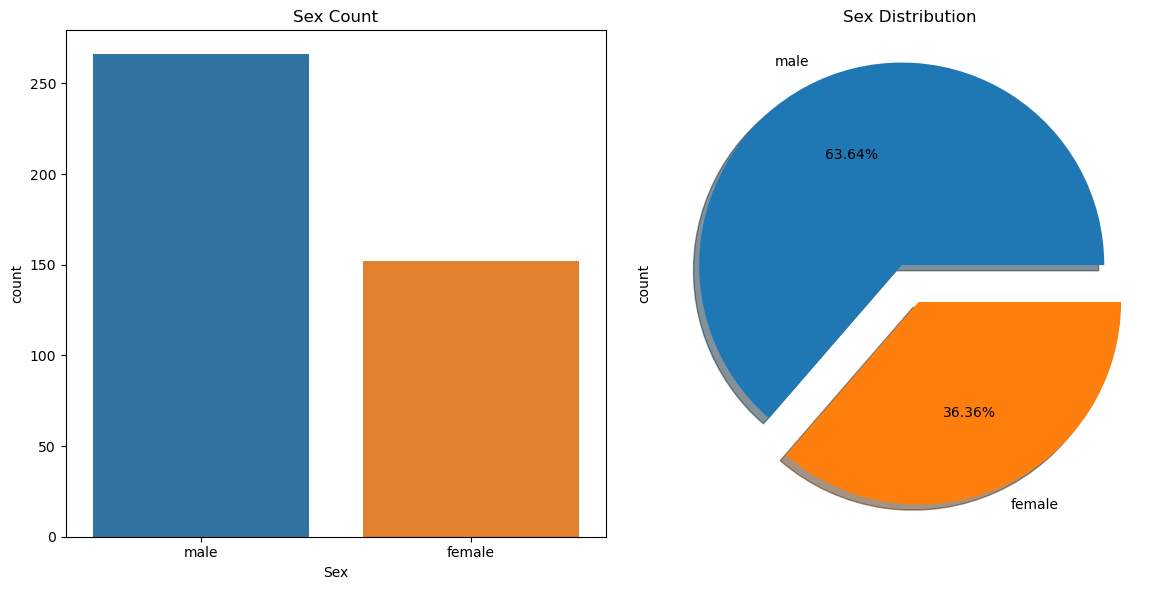

In [52]:
plt.figure(figsize=(12, 6))

# Creating the first subplot - countplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=df, ax=ax1)
ax1.set_title('Sex Count')

# Creating the second subplot - pie chart
ax2 = plt.subplot(1, 2, 2)
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=ax2)
ax2.set_title('Sex Distribution')

plt.tight_layout()  # Ensures subplots do not overlap
plt.show()

In [35]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

In [26]:
# Converting categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [27]:
# Selecting relevant features for prediction excluding the non-numeric columns
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']
X = df[features]
Y = df['Survived']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(418, 9) (334, 9) (84, 9)


In [55]:

model = LogisticRegression(random_state = 42)
model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [56]:
Y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


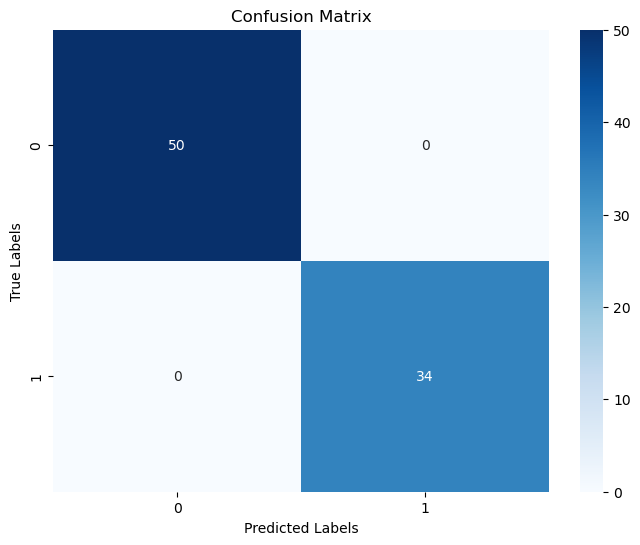

In [58]:
# Predicting labels using the trained model
Y_pred = model.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Displaying the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
